# 1. Introducción Teórica

Algunas de las tareas más comunes en **aprendizaje no supervisado** son:
    
- **Reducción de la dimensionalidad:** reducir el número de atributos
- **Detección de anomalías:** detectar instancias muy diferentes de las otras
- **Clustering:** agrupar instancias similares en clusters

En este notebook nos vamos a centrar en las primeras.

El sentido común nos dice que cuanta más información le demos a un modelo, mejor va a predecir. Pero muchas veces ocurre precisamente lo contrario, ya que ciertos atributos no aportan información relevante para nuestro modelo, o la información que aportan es redundante. A medida que aumenta el número de características o dimensiones, la cantidad de datos que necesitamos para generalizar con precisión aumenta exponencialmente.

Para solventar este problema, se utilizan técnicas de reducción de la dimensión (más propias de aprendizaje no supervisado) y selección de atributos. Ambos procesos tienen el mismo objetivo que es reducir el número de atributos del dataset, pero la forma de alcanzar dicho objetivo es diferente:

- **Selección de atributos:** selecciona los atributos que son más relevantes para el modelo predictivo, para generar modelos predictivos más rápidos y eficientes y proporcionar una mejor comprensión de cómo se han generado los datos. Algunos beneficios de aplicar estas técnicas son:
 - Reducción de overfitting
 - Mejora de precisión del modelo
 - Menor tiempo de entrenamiento

- **Reducción de la dimensión:** crea nuevos atributos que son que son combinaciones de los atributos originales.

Este tipo de técnicas pertenecen a la fase de preprocesamiento de datos.

# 2. Correlación de variables numéricas

El rendimiento de algunos modelos se ve perjudicado si se incluyen varibles predictoras que están muy correlacionadas, por lo que conviene en este caso no incluir variables correalacionadas en el modelo (bastaría con incluir una de ellas).

# 3.  Selección de atributos (*feature selection*)

https://scikit-learn.org/stable/modules/feature_selection.html

Los algoritmos de selección de atributos se engloban generalmente en dos clases diferentes:

- *Métodos de filtrado:* realizan la selección considerando características generales aplicando una medida estadística para asignar una puntuación a cada atributo (Corr. Pearson, ANOVA, LDA...).
- *Métodos de envoltura(wrapper):* los métodos wrapper o envolventes exploran el conjunto completo de atributos para asignarles un puntaje de acuerdo a su poder predictivo en base a la función de clasificación utilizada (Recursive Feature Elimination...).


## 3.2 Eliminar características de baja varianza
Elimina variables cuya varianza no alcanza un cierto umbral, ya que la variables con poca varianza no van a ser discriminatorias ni van a aportar mucha información al modelo. De forma predeterminada, descarta todas las características de varianza cero, es decir, las características que tienen el mismo valor en todas las muestras.)

In [1]:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
print(X)
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

[[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]


array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

## 3.3 Selección de variables univariadas

Selecciona las mejores variables basándose en pruebas estadísticas univariadas. Toman como entrada una función de puntuación que, en general, puede ser, f_regressiónn, chi2, mutual_info_regression, mutual_info_classification:

Algunas técnicas de selección son:

- *Select K best:* Elimina todas las variables menos las k de puntuación más alta en función de la prueba univariada correspondiente 
- *Select Percentile:* Elimina todas las variables menos un porcentaje de variables con puntuación más alta. El porcentaje lo especificamos.
- *Generic Univariate Select:* Selecciona características univariadas con una estrategia configurable que permite seleccionar la mejor estrategia de selección univariante con estimador de búsqueda de hiperparámetros.

Esta selección normalmente se hace basándose en el score de alguna prueba estadística:
- *Para regresión:* f_regresión, mutual_info_regression
- *Para clasificación:* chi2, f_classif, mutual_info_clasif




In [ ]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X, y = load_iris(return_X_y=True)
print(X.shape)
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
print(X_new.shape)

In [ ]:
X[0:5]

In [ ]:
X_new[0:5]

## 3.4 Recursive Feature Elimination

Selecciona grupos de características cada vez más pequeños. Primero se entrena un estimador con todas las variables y se obtiene la importancia de cada una de ellas. Después las menos importantes se eliminan y se vuelve a repetir.

In [10]:
# Quedarse con 5 características eliminando el resto de forma recursiva
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
estimator = SVR(kernel="linear")
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X, y)
print(selector.support_)
print(selector.ranking_)

[ True  True  True  True  True False False False False False]
[1 1 1 1 1 6 4 3 2 5]


Hay muchas más técnicas como algorimto relief, técnicas basadas en árbol...



# 4. Maldición de la dimensionalidad y Reducción de la dimensión

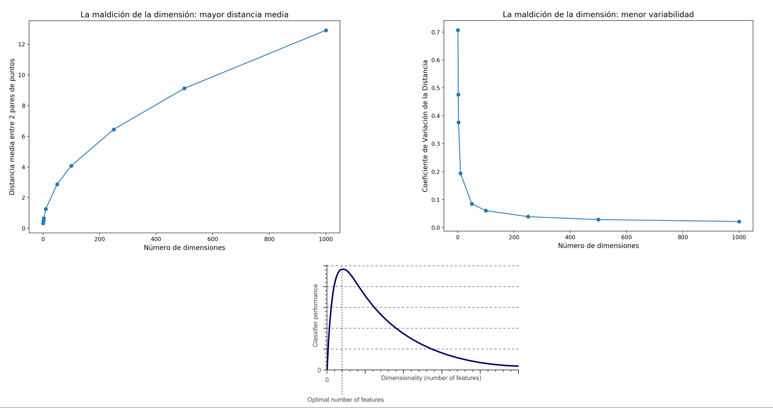

https://medium.com/@nicolasarrioja/la-maldici%C3%B3n-de-la-dimensionalidad-f7a6248cf9a

El sentido común nos dice que cuanta más información le demos a un algoritmo de ML, mejor va a predecir. Muchas veces, ocurre precisamente de al revés: nuestro modelo requiere mucha información al principio pero llegados a cierto punto, el rendimiento del modelo va a disminuir a medida que se aumenten las vbles. Este problema se conoce como **Maldición de la dimensionalidad**.


A medida que aumenta el número de características o atributos (= dimensiones), se necesitan muchos más datos para generalizar con precisión. Cuando hay muchos atributos (muchas dimensiones), hay menos variabilidad en las distancias.

A medida que se incluyen más características, el espacio entre observaciones crece y es más disperso, por lo que es más fácil encontrar un hiperplano que las separe. Pero cuando el número de dimensiones es muy grande, puede haber overfitting. Es decir, **habrá un número óptimo de variables en cada caso.**

Para solucionarlo: o aumentamos la cantidad de datos o reducimos dimensiones. Las técnicas de reducción de dimensionalidad asumen que pueden capturar bastante variabilidad de los datos en menos dimensiones. Así crean un conjunto nuevo de dimensiones que representa nuestros mismos datos con menor dimensionalidad.


Algunas ventajas de reducir dimensionalidad: menos complejidad(modelos y resultados que se interpretan mejor), mejor rendimiento computacional(se identifican y eliminan variables irrelevantes).

**Importante**: son técnicas que buscan reducir el número de atributos o características, no de instancias.


## 4.1 PCA (Principal Component Analysis)

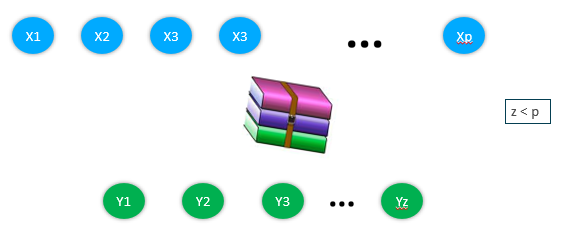

El **análisis de componentes principales o PCA**, es una técnica utilizada para describir un conjunto de datos en términos de nuevas variables («componentes») no correlacionadas. Los componentes se ordenan por la cantidad de varianza original que describen, por lo que la técnica es útil para reducir la dimensionalidad de un conjunto de datos. Es un método estadístico que permite simplificar la complejidad de espacios muestrales con muchas dimensiones a la vez que conserva su información.

Supóngase que existe una muestra con n individuos cada uno con p variables (X1, X2, …, Xp), es decir, el espacio muestral tiene p dimensiones. PCA permite encontrar un número de factores subyacentes (z<p) que explican aproximadamente lo mismo que las p variables originales. Donde antes se necesitaban p valores para caracterizar a cada individuo, ahora bastan z valores. Cada una de estas z nuevas variables recibe el nombre de **componente principal**.

El método de PCA permite por lo tanto “condensar” la información aportada por múltiples variables en solo unas pocas componentes que no estén correlacionadas entre sí(ie: que sean ortogonales). Lo que hace  PCA es buscar la proyección en la cual los datos queden mejor representados transformando un conjunto de vbles que están correlacionadas entre sí en un conjunto de valores que no presentan correlación lineal que son precisamente las componentes principales. PCA crea hiperplanos lineales para representar las dimensiones.


- Estas nuevas variables no están correlacionadas unas con otras (son independientes, son ortogonales = perpendiculares)
- Habrá tantas componentes principales como variables originales, aunque la mayor parte de la información se va a comprimir en las primeras componentes (y haremos selección).
- No tienen significado real: son combinaciones lineales de las variables originales.


Las nuevas variables son combinaciones lineales de las anteriores y se van construyendo según el orden de importancia en cuanto a la variabilidad total que recoge la muestra. La idea es que la nuevas variables no están correlacionadas y sus varianzas van decreciendo progresivamente.

Hay que encontrar la dirección sobre la cual se va a proyectar de tal forma que la varianza de la proyección es máxima. Y esas direcciones vienen dadas por los **vectores propios de la matriz de covarianzas**. Después habrá que transformar los datos a ese nuevo espacio vectorial dado por los vectores propios.

Los vectores propios al ser transformados van a mantener la misma dirección al hacer la transformación mediante la matriz de covarianzas, pero su longitud va a cambiar, serán “estirados” de acuerdo a la longitud de sus respectivos valores propios.

Lo que se va a hacer es “estirar” el plano en la dirección del vector propio cuyo valor propio es más grande (que es el que tiene mayor varianza).

-----------------------------------------------------------------------------
Nota:

Los **valores y vectores propios** se definen como sigue:

	A: V --> V 
	   v -->A(v) = λv para todo v=! 0

Siendo v el vector propio y λ el valor propio.

Los valores propios se calculan resolviendo la ecuación resultante de:

Av –λ* v =0 --> (A-*Id)*v=0 --> det(A- λ a*Id)=0

- Los vectores propios solo existen para matrices cuadradas (n)
- No todas las matrices cuadradas los tienen, pero si los tienen tendrán n
- A cada valor propio le corresponde un vector propio y viceversa.
- Todos los vectores propios son perpendiculares entre ellos.




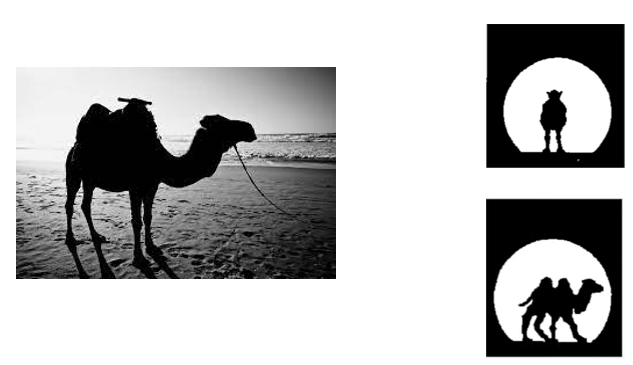

In [3]:
import pandas as pd
import numpy as np


from sklearn import datasets
X,y = datasets.load_iris(return_X_y=True, as_frame=True)

In [7]:
# Importamos el módulo de sklearn para PCA
from sklearn.decomposition import PCA

# Instanciamos PCA
# Podemos indicar el número de componentes, con None, todos los componentes se mantienen
# Rando_state para que salga el mismo resultado
#pca = PCA(n_components=None, random_state = 10)

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

pca = PCA(n_components=None)
# Se hace el ajuste
pca.fit(X_std)
X_std

array([[-0.49990332, -0.35118142, -0.3029615 , ..., -0.8982755 ,
        -0.8315196 , -0.8504569 ],
       [ 0.3014991 ,  0.1946398 ,  0.18568604, ..., -0.8982755 ,
        -0.87658536, -0.8733618 ],
       [-0.45410895, -0.17651856,  0.07945839, ..., -0.9643535 ,
        -0.89911824, -0.8733618 ],
       ...,
       [ 0.5533684 ,  0.5221327 ,  0.6743336 , ..., -0.7661195 ,
        -0.89911824, -0.6672182 ],
       [-1.0265392 , -1.137164  , -1.3227473 , ...,  1.3483769 ,
         1.5118997 ,  1.6232662 ],
       [ 0.64495707,  0.15097415, -1.0040643 , ...,  0.20302469,
         0.22752571,  0.4093096 ]], dtype=float32)

In [ ]:
# El atributo components_ representa los ejes principales del espacio de características representando las direcciones de mayor varianza
# en los datos. Los componentes están ordenados por explained_variance_

# explained_variance_ los valores singulares (propios) de las n componentes en la matriz de covarianzaas
# explained_variance_ratio = el % de varianza explicada por cada uno de los componentes

pca.components_, pca.explained_variance_, pca.explained_variance_ratio_

In [ ]:
pca.components_.T

In [ ]:
# Con el primer componente (0.36138659, -0.08452251,  0.85667061,  0.3582892 ) podríamos explicar el 92% de varianza de los datos, podríamos prescindir de los otros dos

pca.singular_values_

In [ ]:
# Transformamos nuestros datos de entrada, les aplicamos esos compontentes principales para reducir las dimensiones
# Con transform se aplica la reducción de dimensionalidad a X, como hemos puesto n_components = None, nos devuelve los mismos (4)
# Para el caso n_components =3, nos devuelve 3

X_trans2 =pca.transform(X)

## Eigenfaces con PCA

En este ejemplo se "decomponenen" las caras, en "caras base"

**Fuente:** https://github.com/shankarmsy/practice_PCA/blob/master/PCA%20with%20scikit-learn.py

Keys
dict_keys(['data', 'images', 'target', 'DESCR'])
Tamaño
(400, 4096)
El tamaño de la imagen es: 64 x 64


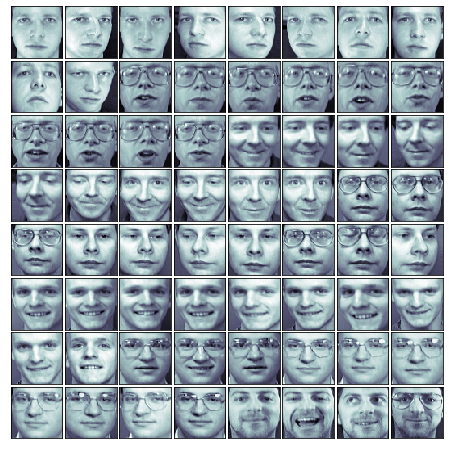

In [5]:
# Descarga de datos de sklearn
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
oliv=fetch_olivetti_faces()
print('Keys')
print(oliv.keys())
print('Tamaño')
print(oliv.data.shape) 
print('El tamaño de la imagen es:', int(np.sqrt(oliv.data.shape[1])), 'x', int(np.sqrt(oliv.data.shape[1])))

# Visualización de algunas caras
# Creación de la figura
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(oliv.images[i], cmap=plt.cm.bone, interpolation='nearest')

plt.show()

In [16]:
# Varianza explicada al comprimir las imagenes a 8x8 píxeles

X,y=oliv.data, oliv.target
pca_oliv = PCA(64)
X_proj = pca_oliv.fit_transform(X)
print(X_proj.shape)
print('Varianza explicada tras reducir la imagen de 64x64 píxeles a 8x8 píxeles')
print(np.cumsum(pca_oliv.explained_variance_ratio_))
print(cumvar)
plt.plot(cumvar)


# Cada una de estas componentes principales explica cierta cantidad de varianza del dataset original.
# Componente con máxima varianza
print('Componente con máxima varianza:')
print(pca_oliv.components_)

(400, 64)
Varianza explicada tras reducir la imagen de 64x64 píxeles a 8x8 píxeles
[0.23812722 0.3780668  0.45775285 0.50773615 0.5438346  0.575404
 0.59967226 0.62003624 0.6396174  0.6563386  0.6722908  0.6866606
 0.699128   0.7105993  0.72122806 0.73100525 0.7401959  0.74835163
 0.75589037 0.7633602  0.770346   0.77649224 0.7823315  0.7880287
 0.79349065 0.7988092  0.8039473  0.8089057  0.81348234 0.81789416
 0.8219141  0.8257559  0.8293753  0.8327206  0.8359239  0.8390841
 0.8421351  0.8451212  0.8479421  0.8506808  0.85327744 0.85581607
 0.85825664 0.8606509  0.86295354 0.8652158  0.86743605 0.8696365
 0.87172294 0.87376755 0.87572986 0.87763554 0.87947047 0.88125455
 0.88301235 0.88472456 0.8863883  0.8879945  0.88957465 0.8911404
 0.89264834 0.89413744 0.8955992  0.89700484]


NameError: name 'cumvar' is not defined

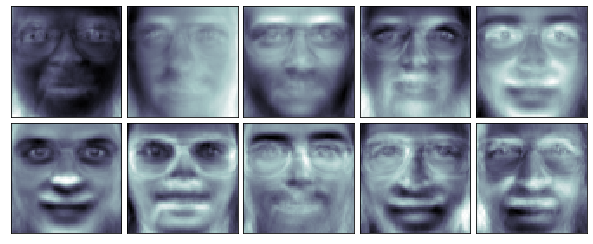

In [10]:
# Visualización del dataset reducido a 8x8 dimensiones.
# Esto NO es una reconstrucción del dataset original, sino las componentes principales o "bases" de nuestros datos reducidos. 
# Las componentes principales son vectores de longitud igual al número de características original (4096), 
# por lo que hacemos reshape (64x64)


fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the faces, each image is 64 by 64 pixels
for i in range(10):
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
    ax.imshow(np.reshape(pca_oliv.components_[i,:], (64,64)), cmap=plt.cm.bone, interpolation='nearest')


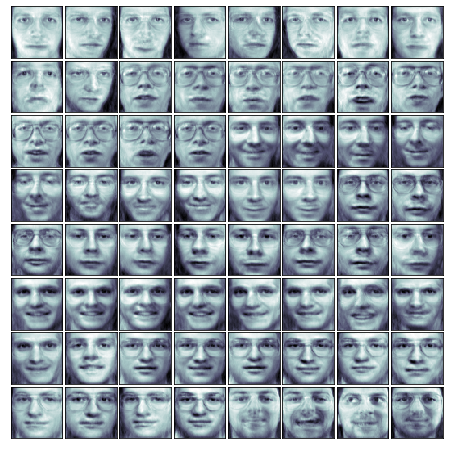

In [17]:
# Reconstruimos las imágenes usando el dataset reducido
# Es decir, transformamos las imágenes 64x64 en imágenes 8x8. Ahora visualizamos 
# Ahora para visualizar esas imágenes habría que transformar las imágenes 8x8 en imágenes 64x64
# Pero no estamos volviendo a crear los datos originales, simplemente estamos volviendo a la dimensión real de las imágenes.


X_inv_proj = pca_oliv.inverse_transform(X_proj)
#reshaping as 400 images of 64x64 dimension
X_proj_img = np.reshape(X_inv_proj,(400,64,64))

#Setup a figure 8 inches by 8 inches
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the faces, each image is 64 by 64 dimension but 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(X_proj_img[i], cmap=plt.cm.bone, interpolation='nearest')

## 4.2 Manifold Learning

PCA es una técnica muy potente, pero asume que los datos pueden ser modelados linealmente, ya que obtiene nuevas características a partir de combinaciones lineales de las anteriores. Así, surgen nuevas técnicas que puedan suplir estas carencia, como manifold learning, que intentan "aprender" los manifolds, superficies curvas en el espacio multidimensional.

**Manifold Learning** 

Un **manifold** es una estructura matemática que abstrae una región conectada en la que cada punto está asociado con un conjunto de puntos en su vecindad. 

Hay ciertas asunciones:

- Hay relaciones no lineales que pueden modelar a través de manifolds
- No es importante mantener las dimensiones de los datos. En lugar de proyectar se pueden transformar con operaciones más complejas
- Se pueden extraer local linear patches, que es similar a tratar la superficie curva como si tuviera varias vecindades, y los puntos podrían mantener las distancias con los puntos próximos.

La idea es simple: en estructuras de alta dimentsion la información más relevante se concentra en un pequeño número de manifolds de menor dimensión, que se pueden obtener mediante una simple transformación. Esto se conoce como **manifold hyphotesis** y sus dos puntos clave son las distribución de los datos y la conexión.

- La distribución de los datos en imágenes, texto, está muy concentrada.
- Los puntos más relevantes están conectados con otros puntos relevantes (se puede obtener un píxel a partir de sus vecinos)

Estas técnicas reducen los costes computacionales.

**Fuentes**: 

https://scikit-learn.org/stable/modules/manifold.html#

https://gitlab.com/Winston-90/unsupervised_algorithms/-/blob/main/chapters/01.%20Dimensionality%20Reduction.md

Estos algoritmos se basan en gran medida en conservar las distancias entre los objetos al reducir la dimensionalidad.

- **LLE (Locally Linear Embedding)** studies the linear connections between data points in the original space, and then tries to move to a smaller dimensional space, while preserving within local neighborhoods. There are a lot of modifications of this algorithm, like Modified Locally Linear Embedding (MLLE), Hessian-based LLE (HLLE), and others.


- **Isomap (short for Isometric Mapping)** сreates a graph by connecting each instance to its nearest neighbors, and then reduces dimensionality while trying to preserve the geodesic distances (distance between two vertices in a graph) between the instances. Isomap optimizes distances along a discovered manifold.


- **t-SNE (t-distributed Stochastic Neighbor Embedding)** Reduces dimensionality by saving the relative distance between points in space - so it keeps similar instances close to each other and dissimilar instances apart. Most often used for data visualization. The algorithm converts relationships in original space into t-distributions, or normal distributions with small sample sizes and relatively unknown standard deviations.

### Comparación de algoritmos para S

LLE: 0.076 sec
LTSA: 0.11 sec
Hessian LLE: 0.17 sec
Modified LLE: 0.13 sec
Isomap: 0.31 sec
MDS: 2.1 sec
SE: 0.047 sec
t-SNE: 1.8 sec


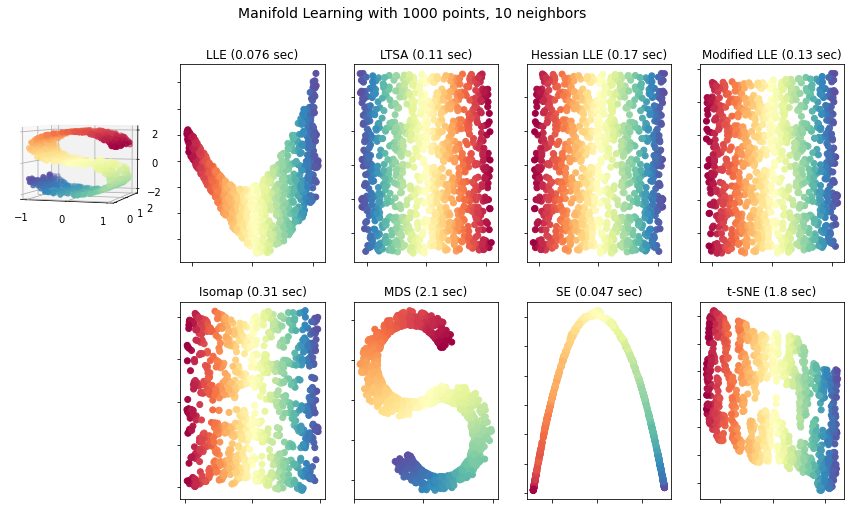

In [18]:
# Fuente: https://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html
        
from collections import OrderedDict
from functools import partial
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

# Next line to silence pyflakes. This import is needed.
Axes3D

n_points = 1000
X, color = datasets.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

# Create figure
fig = plt.figure(figsize=(15, 8))
fig.suptitle(
    "Manifold Learning with %i points, %i neighbors" % (1000, n_neighbors), fontsize=14
)

# Add 3d scatter plot
ax = fig.add_subplot(251, projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

# Set-up manifold methods
LLE = partial(
    manifold.LocallyLinearEmbedding,
    n_neighbors=n_neighbors,
    n_components=n_components,
    eigen_solver="auto",
)

methods = OrderedDict()
methods["LLE"] = LLE(method="standard")
methods["LTSA"] = LLE(method="ltsa")
methods["Hessian LLE"] = LLE(method="hessian")
methods["Modified LLE"] = LLE(method="modified")
methods["Isomap"] = manifold.Isomap(n_neighbors=n_neighbors, n_components=n_components)
methods["MDS"] = manifold.MDS(n_components, max_iter=100, n_init=1)
methods["SE"] = manifold.SpectralEmbedding(
    n_components=n_components, n_neighbors=n_neighbors
)
methods["t-SNE"] = manifold.TSNE(n_components=n_components, init="pca", random_state=0)

# Plot results
for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    Y = method.fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (label, t1 - t0))
    ax = fig.add_subplot(2, 5, 2 + i + (i > 3))
    ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")

plt.show()

### Comparación de algoritmos para la esfera

standard: 0.11 sec
ltsa: 0.18 sec
hessian: 0.27 sec
modified: 0.27 sec
ISO: 0.33 sec
MDS: 1.7 sec
Spectral Embedding: 0.12 sec


C:\Users\UT06426\Anaconda3new\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\UT06426\Anaconda3new\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


t-SNE: 5.5 sec


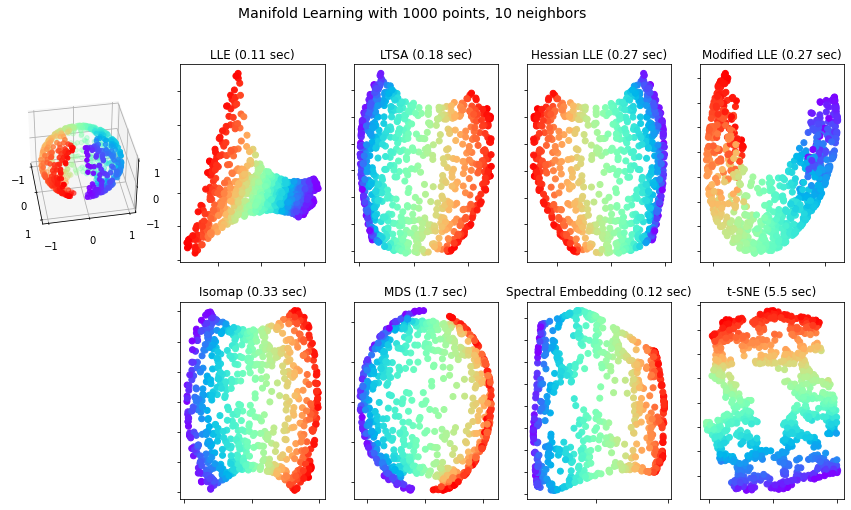

In [2]:
# Fuente: https://scikit-learn.org/stable/auto_examples/manifold/plot_manifold_sphere.html#sphx-glr-auto-examples-manifold-plot-manifold-sphere-py

from time import time

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold
from sklearn.utils import check_random_state

# Next line to silence pyflakes.
Axes3D

# Variables for manifold learning.
n_neighbors = 10
n_samples = 1000

# Create our sphere.
random_state = check_random_state(0)
p = random_state.rand(n_samples) * (2 * np.pi - 0.55)
t = random_state.rand(n_samples) * np.pi

# Sever the poles from the sphere.
indices = (t < (np.pi - (np.pi / 8))) & (t > ((np.pi / 8)))
colors = p[indices]
x, y, z = (
    np.sin(t[indices]) * np.cos(p[indices]),
    np.sin(t[indices]) * np.sin(p[indices]),
    np.cos(t[indices]),
)

# Plot our dataset.
fig = plt.figure(figsize=(15, 8))
plt.suptitle(
    "Manifold Learning with %i points, %i neighbors" % (1000, n_neighbors), fontsize=14
)

ax = fig.add_subplot(251, projection="3d")
ax.scatter(x, y, z, c=p[indices], cmap=plt.cm.rainbow)
ax.view_init(40, -10)

sphere_data = np.array([x, y, z]).T

# Perform Locally Linear Embedding Manifold learning
methods = ["standard", "ltsa", "hessian", "modified"]
labels = ["LLE", "LTSA", "Hessian LLE", "Modified LLE"]

for i, method in enumerate(methods):
    t0 = time()
    trans_data = (
        manifold.LocallyLinearEmbedding(
            n_neighbors=n_neighbors, n_components=2, method=method
        )
        .fit_transform(sphere_data)
        .T
    )
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))

    ax = fig.add_subplot(252 + i)
    plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis("tight")

# Perform Isomap Manifold learning.
t0 = time()
trans_data = (
    manifold.Isomap(n_neighbors=n_neighbors, n_components=2)
    .fit_transform(sphere_data)
    .T
)
t1 = time()
print("%s: %.2g sec" % ("ISO", t1 - t0))

ax = fig.add_subplot(257)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("%s (%.2g sec)" % ("Isomap", t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

# Perform Multi-dimensional scaling.
t0 = time()
mds = manifold.MDS(2, max_iter=100, n_init=1)
trans_data = mds.fit_transform(sphere_data).T
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))

ax = fig.add_subplot(258)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

# Perform Spectral Embedding.
t0 = time()
se = manifold.SpectralEmbedding(n_components=2, n_neighbors=n_neighbors)
trans_data = se.fit_transform(sphere_data).T
t1 = time()
print("Spectral Embedding: %.2g sec" % (t1 - t0))

ax = fig.add_subplot(259)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("Spectral Embedding (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

# Perform t-distributed stochastic neighbor embedding.
t0 = time()
tsne = manifold.TSNE(n_components=2, init="pca", random_state=0)
trans_data = tsne.fit_transform(sphere_data).T
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))

ax = fig.add_subplot(2, 5, 10)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

plt.show()

### Comparacion de algoritmos para digits

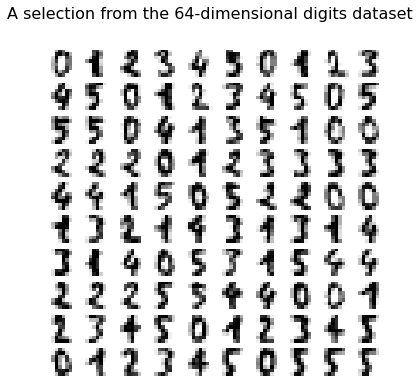

In [19]:
# Fuente https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py

from sklearn.datasets import load_digits

digits = load_digits(n_class=6)
X, y = digits.data, digits.target
n_samples, n_features = X.shape
n_neighbors = 30


import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)

In [22]:
import numpy as np
from matplotlib import offsetbox
from sklearn.preprocessing import MinMaxScaler


def plot_embedding(X, title, ax):
    X = MinMaxScaler().fit_transform(X)
    for digit in digits.target_names:
        ax.scatter(
            *X[y == digit].T,
            marker=f"${digit}$",
            s=60,
            color=plt.cm.Dark2(digit),
            alpha=0.425,
            zorder=2,
        )
    shown_images = np.array([[1.0, 1.0]])  # just something big
    for i in range(X.shape[0]):
        # plot every digit on the embedding
        # show an annotation box for a group of digits
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 4e-3:
            # don't show points that are too close
            continue
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]
        )
        imagebox.set(zorder=1)
        ax.add_artist(imagebox)

    ax.set_title(title)
    ax.axis("off")

In [31]:
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomTreesEmbedding
from sklearn.manifold import (
    Isomap,
    LocallyLinearEmbedding,
    MDS,
    SpectralEmbedding,
    TSNE,
)
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.random_projection import SparseRandomProjection

embeddings = {
    "Random projection embedding": SparseRandomProjection(
        n_components=2, random_state=42
    ),
    "Truncated SVD embedding": TruncatedSVD(n_components=2),
    "Linear Discriminant Analysis embedding": LinearDiscriminantAnalysis(
        n_components=2
    ),
    "Isomap embedding": Isomap(n_neighbors=n_neighbors, n_components=2),
    "Standard LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="standard"
    ),
    "Modified LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="modified"
    ),
    "Hessian LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="hessian"
    ),
    "LTSA LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="ltsa"
    ),
    "MDS embedding": MDS(n_components=2, n_init=1, max_iter=120, n_jobs=2),
    "Random Trees embedding": make_pipeline(
        RandomTreesEmbedding(n_estimators=200, max_depth=5, random_state=0),
        TruncatedSVD(n_components=2),
    ),
    "Spectral embedding": SpectralEmbedding(
        n_components=2, random_state=0, eigen_solver="arpack"
    ),
    "t-SNE embeedding": TSNE(
        n_components=2,
        init="pca",
        learning_rate="auto",
        n_iter=500,
        n_iter_without_progress=150,
        n_jobs=2,
        random_state=0,
    ),
    "NCA embedding": NeighborhoodComponentsAnalysis(
        n_components=2, init="pca", random_state=0
    ),
}

In [30]:
# Una vez que declaramos todos los métodos de interés, podemos ejecutar y realizar la proyección de los datos originales. 
# Almacenaremos los datos proyectados así como el tiempo computacional necesario para realizar cada proyección.

from time import time

projections, timing = {}, {}
for name, transformer in embeddings.items():
    if name.startswith("Linear Discriminant Analysis"):
        data = X.copy()
        data.flat[:: X.shape[1] + 1] += 0.01  # Make X invertible
    else:
        data = X

    print(f"Computing {name}...")
    start_time = time()
    projections[name] = transformer.fit_transform(data, y)
    timing[name] = time() - start_time

Computing Random projection embedding...
Computing Truncated SVD embedding...
Computing Linear Discriminant Analysis embedding...
Computing Isomap embedding...
Computing Standard LLE embedding...
Computing Modified LLE embedding...
Computing Hessian LLE embedding...
Computing LTSA LLE embedding...
Computing MDS embedding...
Computing Random Trees embedding...
Computing Spectral embedding...
Computing t-SNE embeedding...


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

In [ ]:
# Ploteamos la proyección para cada método

from itertools import zip_longest

fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(17, 24))

for name, ax in zip_longest(timing, axs.ravel()):
    if name is None:
        ax.axis("off")
        continue
    title = f"{name} (time {timing[name]:.3f}s)"
    plot_embedding(projections[name], title, ax)

plt.show()

Notas:

- PCA tiene problemas con las relaciones no lineales, porque es  lineal. Las relaciones nolineales son muy frecuentes.

- Manifold learning intenta generalizar PCA para reducir la dimensión en cualquier tipo de estructuras de datos, bajo la idea de que los manifolds, curvas o superficies continuas, deberían ser modelados priorizando distancias locales en lugar de globales.

- Isomap trata de preservar distancias geodésicas (línea de mínima longitud que une dos puntos en una superficie dada y está contenida en esa superficie), o distancias medidas en la superficie curva del manifold.

- Locally Linear Embeddings es una especie de representación del manifold como parches lineales, en los cuales se aplica PCA. Preserva las distancias locales.

- Locally Linear Embeddings can be thought of as representing the manifold as several linear patches, in which PCA is performed on.

- t-SNE prioriza preservar las distancias locales usando probabilidades y distribuciones t. Muy utilizado para visualizaciones

## 4.3 Autoencoders

También se pueden utilizar redes neuronales para reducir la dimensión. **Autoencoder** es un tipo de red neuronal cuya salida es una "representación" lo más similar posible a los datos de entrada, pero de menor dimensión (el número de neuronas de salida es mucho menor que el de entrada.




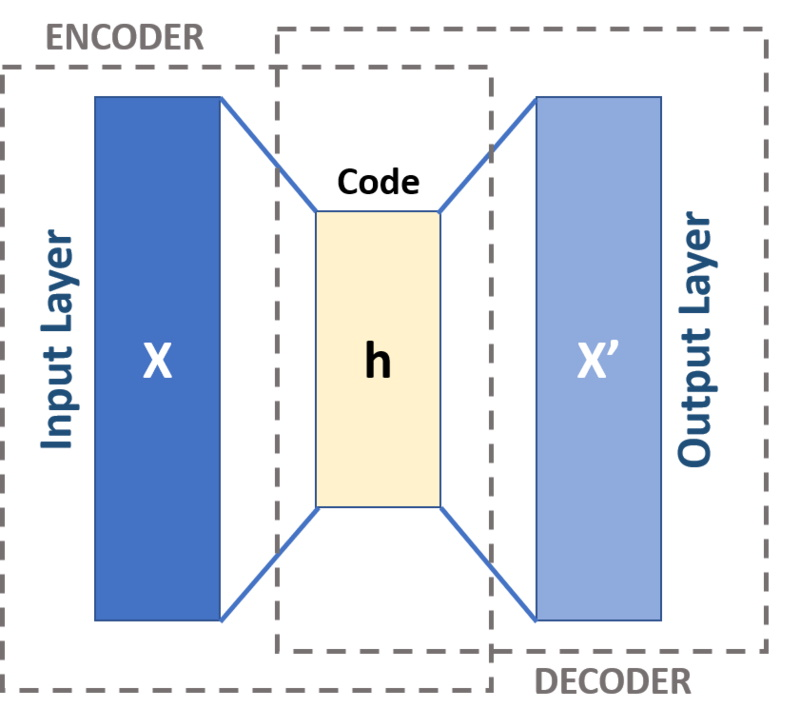

Si se utilizan funciones de activación lineales, se obtendrán algoritmos de reducción de la dimensión lineales, como PCA, pero si se usan funciones de activación no lineales, se podrán obtener representaciones más complejas del espacio latente.

Hay muchos tipos de autoencoders:

- Denoising Autoencoders: para "limpiar" imágenes o sonido
- Variational Autoencoders: el lugar de tratar con valores, lo hacen con distribuciones
- Convolutional Autoencoders: para imágenes
- Recurrent Autoencoders: para series temporales o texto


1.2396343
0.055912483
0.055797867


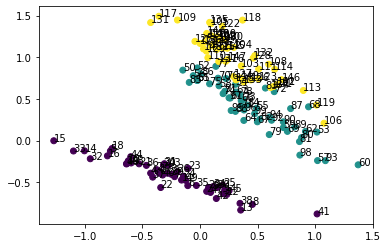

In [35]:
# Fuente: https://programmerclick.com/article/28261274528/

import torch.nn as nn
from torch.autograd import Variable as V
import torch
from torch.utils.data import DataLoader,Dataset,TensorDataset
from sklearn.datasets import load_iris
from  sklearn.preprocessing import MinMaxScaler
import numpy
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
  
# Leer datos
iris=load_iris()
x=iris.data
y=iris.target
Y = y # Reserva en el dibujo
 
# Normaliza la entrada, porque el codificador automático solo usa entrada
MMScaler=MinMaxScaler()
x=MMScaler.fit_transform(x)
iforestX=x
 
# Los datos de entrada se convierten en el tipo de conjunto de datos aceptado por la red neuronal y el lote se establece en 10
tensor_x=torch.from_numpy(x.astype(numpy.float32))
tensor_y=torch.from_numpy(y.astype(numpy.float32))
my_dataset=TensorDataset(tensor_x,tensor_y)
my_dataset_loader=DataLoader(my_dataset,batch_size=10,shuffle=False)
#print(isinstance(my_dataset,Dataset))
 
 
# Definir un modelo de codificador automático
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder,self).__init__()
        self.encoder=nn.Sequential(
            nn.Linear(4, 3),
            nn.Tanh(),
            nn.Linear(3, 2),
        )
        self.decoder=nn.Sequential(
            nn.Linear(2, 3),
            nn.Tanh(),
            nn.Linear(3, 4),
            nn.Sigmoid()
        )
 
    def forward(self, x):
        encoder=self.encoder(x)
        decoder=self.decoder(encoder)
        return encoder,decoder
 
model=autoencoder()
 
# Loss Function
criterion=nn.MSELoss()
 
# Optimizer
optimizer = torch.optim.Adam (model.parameters (), lr = 0.01) # Si se usa SGD, la convergencia no disminuirá
 
# Epochs 
for epoch in range(300):
    total_loss = 0
    for i ,(x,y) in enumerate(my_dataset_loader):
       _,pred=model(V(x))
       loss=criterion(pred,x)
       optimizer.zero_grad()
       loss.backward()
       optimizer.step()
       total_loss+=loss
    if epoch % 100==0:
        print(total_loss.data.numpy())
 
 
# Reducción de dimensionalidad y visualización basada en el modelo entrenado
 
x_=[]
y_=[]
for i, (x, y) in enumerate(my_dataset):
    _, pred = model(V(x))
    #loss = criterion(pred, x)
    dimension=_.data.numpy()
    x_.append(dimension[0])
    y_.append(dimension[1])
 
plt.scatter(numpy.array(x_),numpy.array(y_),c=Y)
 
for i in range(len(numpy.array(x_))):
    plt.annotate(i,(x_[i],y_[i]))
 
plt.show()


In [34]:
!pip install torch

## ¿Como escoger un algoritmo de reducción de la dimensión?

Primero escala los datos.
- Si el objetivo es visualizar los datos, se debería probar en primer lugar t-SNE
- Si la cantidad de datos es muy grande, autoencoders pueden ser útiles para encontrar representaciones complejas del espacio latente
- Si no se tienen muchos datos, PCA para reducir la dimensión de forma lineal y manifold learning para no-lineal


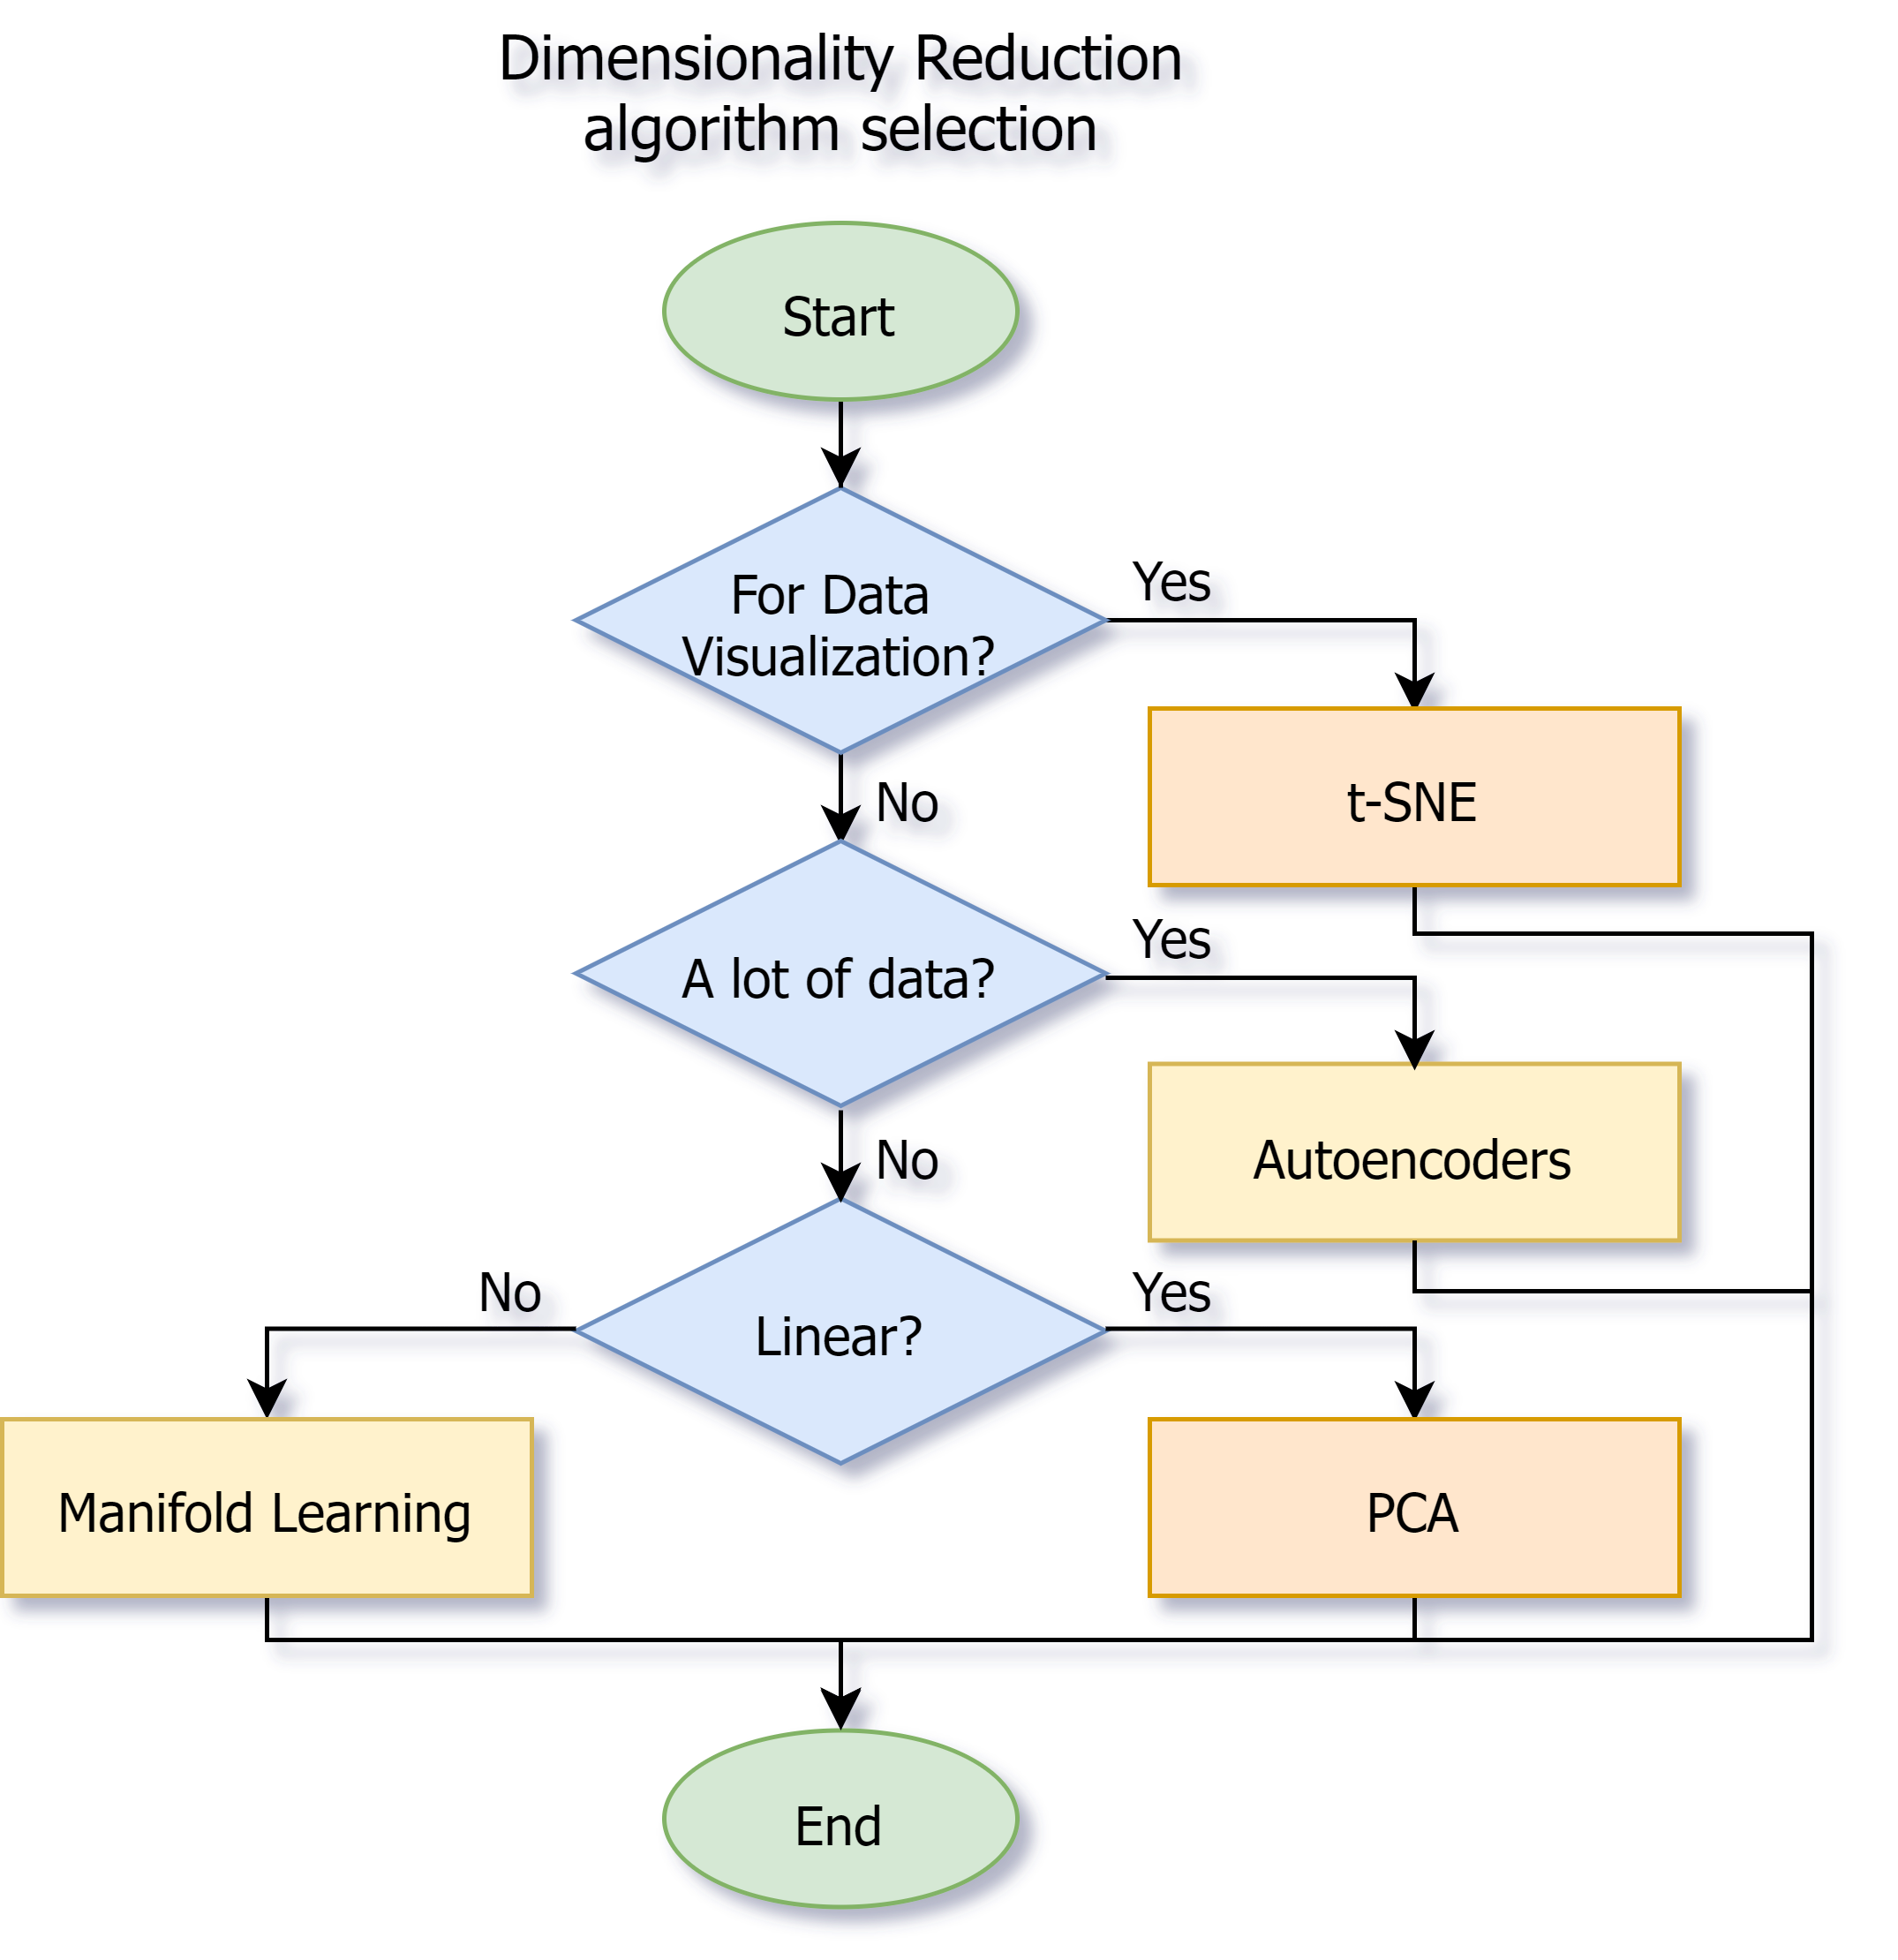

Otros algoritmos menos conocidos:

- Non-negative matrix factorization (NMF)
- Random Projections
- Linear Discriminant Analysis (LDA)
- Multidimensional Scaling (MDS)
- and others
